# ANN

Universal function approximator

# Simple RNNS

When we know that there is a sequential pattern in the data, we use a special form of neural network: RNNs

 - RNN: Reccurent Neural Networks
 - Finding Structure in Time: https://crl.ucsd.edu/~elman/Papers/fsit.pdf
 
Vertical Representation 
![](https://i.stack.imgur.com/BFR79.png) 


Horizantal Representation
 ..






We use RNN for time series analysis
 - Number of new covid casses
 - Currency 

![](https://frontera.net/wp-content/uploads/2017/02/Turkish-Lira-to-1-USD.jpg)



## Assumption
 $x_t$ can be predicted via  $x_{t-1}$,$x_{t-2}$, ... ,$x_{t-\tau}$ 
  
  - Here $\tau$ is the sequence length

### Simple example

data = [1,2,3,4,3,2,1,2,3,4, ..]

### Another example: text analysis
In the example below, we can predict the missing word [...] based on previous words. Probably it will be 'juice' !!

 - I drink apple [...] this morning. 

For considering both directions, you can look to Bi-directional Reccurent Neural Networks




Source: https://blog.floydhub.com/a-beginners-guide-on-recurrent-neural-networks-with-pytorch/
![](https://blog.floydhub.com/content/images/2019/04/rnn-2.gif)


![](https://i.stack.imgur.com/BFR79.png) 

In the following formula, information of the previpus hidden state $h_{t-1}$ is carried on in the next hidden state $h_t$
$$
h_t = tanh([W_{xh}, W_{hh}][x_t, h_{t-1}]) = tanh(W_{ch} c_t)
$$
Here $c_t = [x_t, h_{t-1}]$
$$
y_t = tanh(W_{hy}h_{t-1})
$$

As parameters
 - We have $W_{ch}$ and $W_{hy}$



# The Unreasonable Effectiveness of Recurrent Neural Networks
 REference: http://karpathy.github.io/2015/05/21/rnn-effectiveness/

 - Many-to-many Examples: translation, Time dependent autoencoder 
 - Manby-to-one Example: Sentiment analysis
 ![](https://karpathy.github.io/assets/rnn/diags.jpeg)

# Coding RNNs from scratch

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
# input_size :  size of x_t
# hidden_size: size of h_t
# output_size: size of y_t

class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN, self).__init__()
    self.hidden_size = hidden_size
    # Tranformation from combined vector c_t = [x_t, h_{t-1}] to h_t
    self.x2h = nn.Linear(input_size + hidden_size, hidden_size) 
    self.h2y = nn.Linear(hidden_size, output_size) 
    self.tanh = nn.Tanh()

  def forward(self, input_tensor, hidden):
    #  We obtain c_t = [x_t, h_{t-1}] 
    combined = torch.cat((input_tensor, hidden), 1) 
    #  We compute next hidden : h_t = tanh(W_{ch} c_t)
    hidden = self.tanh(self.x2h(combined))
    # We compute output y_t = tanh(W_{hy}h_{t-1})
    output = self.h2y(hidden)
    return output, hidden

  def initHidden(self, batch_size = 32):
    # initialize h_0 
    return torch.zeros(batch_size, self.hidden_size)

In [3]:
rnn = RNN(input_size = 4, hidden_size = 2, output_size = 1)
h = rnn.initHidden(batch_size = 1)
x = torch.tensor([[1,2,3,4]])
output, next_hidden = rnn.forward(x, h)

In [4]:
h

tensor([[0., 0.]])

In [5]:
x

tensor([[1, 2, 3, 4]])

In [6]:
next_hidden

tensor([[-0.9599, -0.5809]], grad_fn=<TanhBackward0>)

In [7]:
output

tensor([[0.5068]], grad_fn=<AddmmBackward0>)

# Generate Synthetic Data

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,100,1000)
ysin = np.sin(x) + np.random.randn(len(x))/5
ycos = np.cos(x) + np.random.randn(len(x))/5

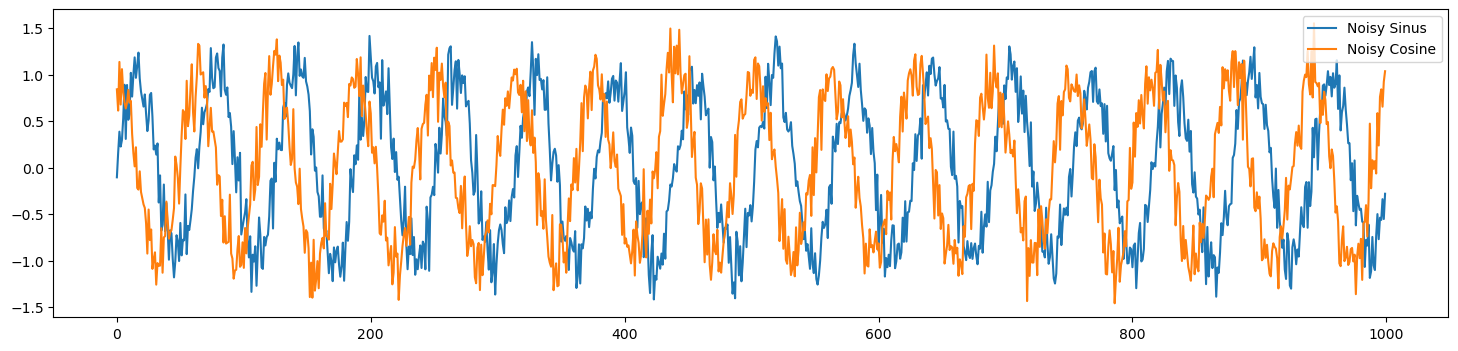

In [9]:
plt.figure(figsize=(18,4))
plt.plot(ysin, label = 'Noisy Sinus')
plt.plot(ycos, label = 'Noisy Cosine')
plt.legend()

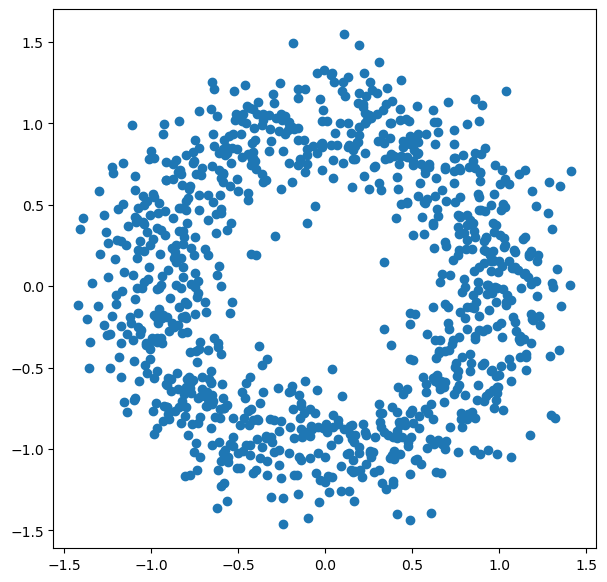

In [10]:
plt.figure(figsize=(7,7))
plt.scatter(ysin, ycos)

In [11]:
data = np.concatenate((ysin.reshape(len(ysin),1), ycos.reshape(len(ysin),1)), 1)
data.shape

(1000, 2)

In [12]:
data[:6]

array([[-0.10529219,  0.84063512],
       [ 0.15715848,  0.61233684],
       [ 0.38564031,  1.13529945],
       [ 0.2256944 ,  0.67727444],
       [ 0.29760522,  1.05787598],
       [ 0.52885806,  0.80959703]])

# Train an RNN
 to predict 5th data from previous 4 data

In [13]:
input_size = 2 # 2 dimensional data
seq_len = 4

x_tensor = torch.tensor([data[i:i+seq_len] for i in range(0, len(data) - seq_len)]).float()
y_tensor = torch.tensor([data[i] for i in range(seq_len, len(data))]).float()

C:\Users\Mete\AppData\Local\Temp\ipykernel_8380\3342820736.py:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:233.)
  x_tensor = torch.tensor([data[i:i+seq_len] for i in range(0, len(data) - seq_len)]).float()


In [14]:
x_tensor[1]

tensor([[0.1572, 0.6123],
        [0.3856, 1.1353],
        [0.2257, 0.6773],
        [0.2976, 1.0579]])

In [15]:
y_tensor[1]

tensor([0.5289, 0.8096])

In [16]:
x_tensor.shape, y_tensor.shape

(torch.Size([996, 4, 2]), torch.Size([996, 2]))

## Train
 - to be explained

In [17]:
step = 0
n_epochs = 20 # how many times you will see whole data during training
clip = 5  
batch_size = 2 # You update your parameters (W_ch, W_hy) after seeing 10 observation

input_size = 2 # 2 dimensional data
seq_len = 4 # After 4 time steps predict 5th time step

from torch.utils.data import TensorDataset, DataLoader
train_data = TensorDataset(x_tensor, y_tensor)
train_loader = DataLoader(train_data, batch_size = batch_size, shuffle = False)

# You create yout network 
rnn = RNN(input_size = input_size, hidden_size = 2, output_size = 2)
optimizer = optim.Adam(rnn.parameters(), lr = 0.001)
criterion = nn.MSELoss()

# Training begins
all_losses = []
for epoch in range(n_epochs):  
    # x: batch_size =10 observations of seq_len =4 inputs, each input is 2D
    # output y_hat: Make prediction based on x
    # y: batch_size =10 observations of output, each output is 2D  
    # Error: MSELoss criterion between y and y_hat
    for x, y in train_loader:
        step += 1  
        rnn.zero_grad()
        
        if y.shape[0] != batch_size: break

        x = x.reshape(seq_len,batch_size,input_size)
        h = rnn.initHidden(batch_size)
        for unfold in range(seq_len):
            output, h = rnn(x[unfold], h)
        
        loss = criterion(output, y.float())
        loss.backward()
        nn.utils.clip_grad_norm_(rnn.parameters(), clip)
        optimizer.step()
    all_losses.append(loss.item())

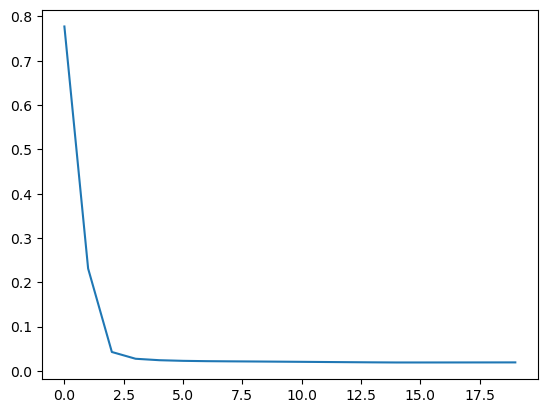

In [18]:
plt.plot(all_losses)

## Predict

In [19]:
rnn.eval()
pred = []
for x, y in train_loader:
    if y.shape[0] != batch_size: break

    x = x.reshape(seq_len,batch_size,input_size)
    h = rnn.initHidden(batch_size)
    for unfold in range(seq_len):
        output, h = rnn(x[unfold], h)
    pred.append(output)

In [20]:
pred = torch.cat(pred)
pred = pred.detach().numpy()

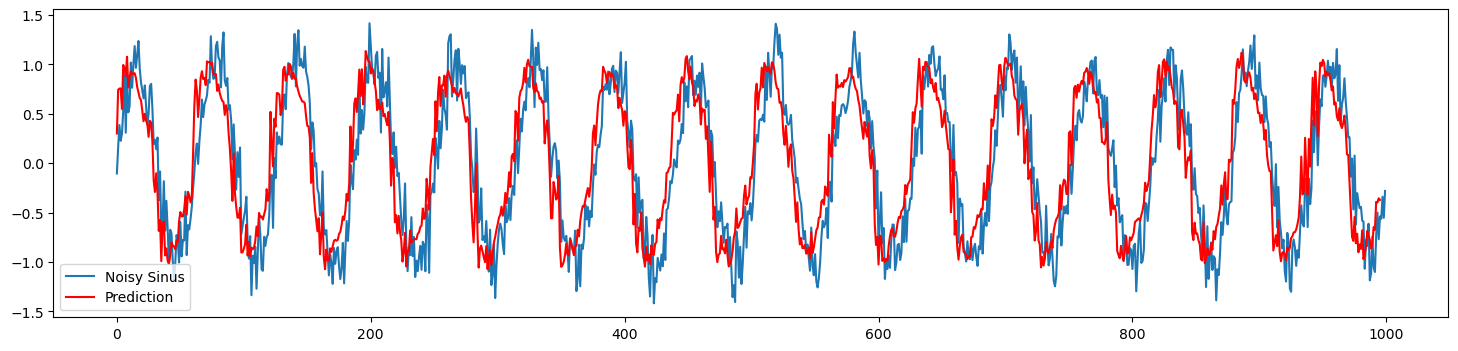

In [21]:
plt.figure(figsize=(18,4))
plt.plot(ysin, label = 'Noisy Sinus')
plt.plot(pred[:,0], 'r', label = 'Prediction')
plt.legend()

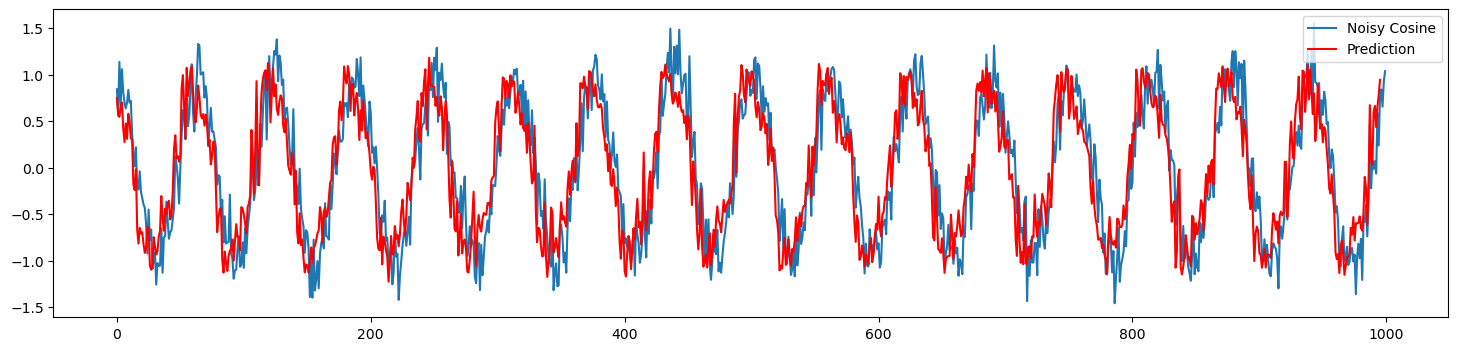

In [22]:
plt.figure(figsize=(18,4))
plt.plot(ycos, label = 'Noisy Cosine')
plt.plot(pred[:,1], 'r', label = 'Prediction')
plt.legend()

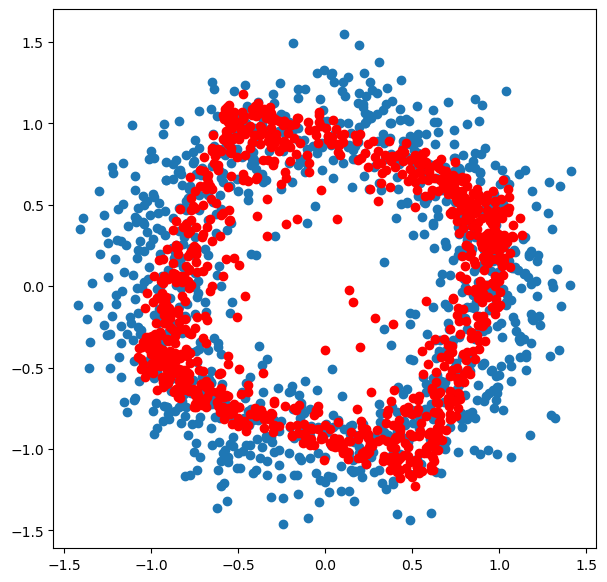

In [23]:
plt.figure(figsize=(7,7))
plt.scatter(ysin, ycos)
plt.scatter(pred[:,0], pred[:,1], c = 'r')